In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DAU

In [ ]:
DAU = pd.read_csv('/content/drive/MyDrive/Mobile Game/DAU.csv')
DAU

,date,day_of_week,DAU
0,2018-06-12,Tuesday,286
1,2018-06-13,Wednesday,463
2,2018-06-14,Thursday,428
3,2018-06-15,Friday,445
4,2018-06-16,Saturday,404
...,...,...,...
109,2018-09-29,Saturday,460
110,2018-09-30,Sunday,482
111,2018-10-01,Monday,448
112,2018-10-02,Tuesday,439


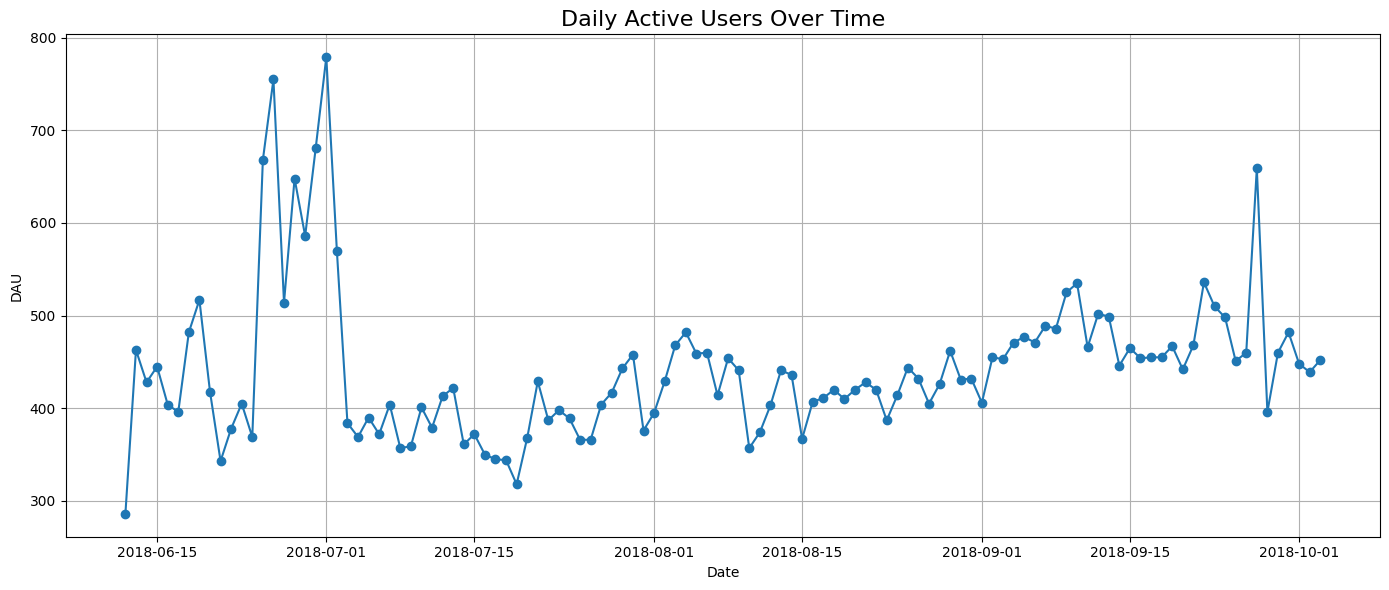

In [ ]:
DAU['date'] = pd.to_datetime(DAU['date'])

plt.figure(figsize=(14, 6))
plt.plot(DAU['date'], DAU['DAU'], marker='o', linewidth=1.5)
plt.title('Daily Active Users Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('DAU')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-15-c264ff73eb38>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_dau = DAU.groupby('day_of_week')['DAU'].mean().reset_index()
<ipython-input-15-c264ff73eb38>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_dau, x='day_of_week', y='DAU', palette='crest')


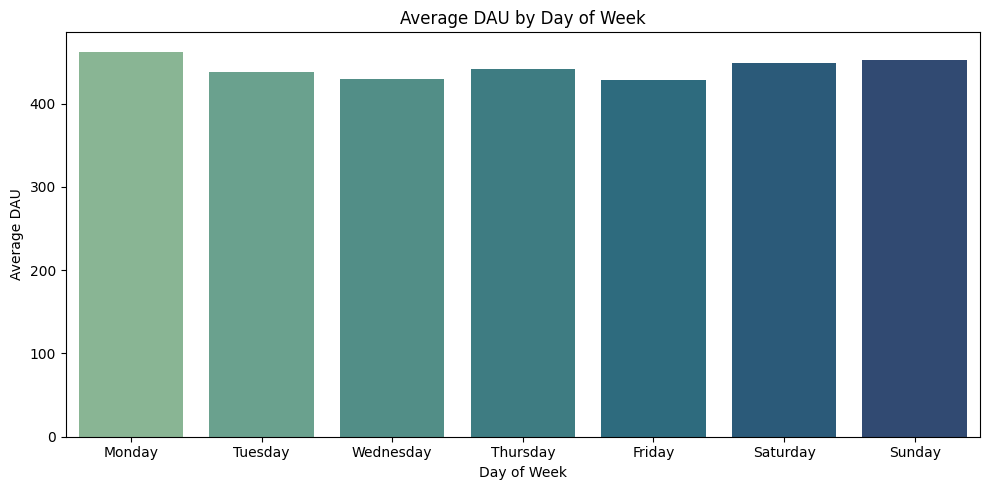

In [ ]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
DAU['day_of_week'] = pd.Categorical(DAU['day_of_week'], categories=ordered_days, ordered=True)

avg_dau = DAU.groupby('day_of_week')['DAU'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=avg_dau, x='day_of_week', y='DAU', palette='crest')
plt.title('Average DAU by Day of Week')
plt.ylabel('Average DAU')
plt.xlabel('Day of Week')
plt.tight_layout()
plt.show()

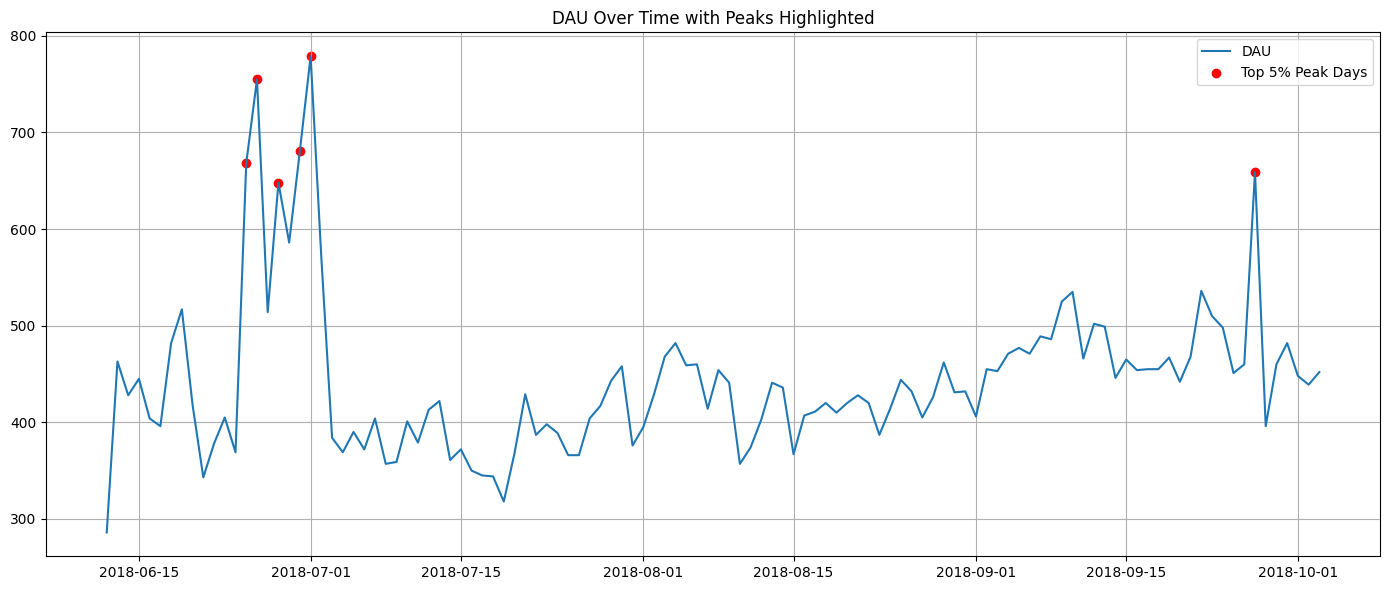

In [ ]:
peak_days = DAU[DAU['DAU'] > DAU['DAU'].quantile(0.95)]

plt.figure(figsize=(14, 6))
plt.plot(DAU['date'], DAU['DAU'], label='DAU')
plt.scatter(peak_days['date'], peak_days['DAU'], color='red', label='Top 5% Peak Days')
plt.title('DAU Over Time with Peaks Highlighted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Install


In [ ]:
install = pd.read_csv('/content/drive/MyDrive/Mobile Game/install_new_daily.csv')
install

,install_date,installs
0,2018-06-12,32
1,2018-06-13,29
2,2018-06-14,36
3,2018-06-15,39
4,2018-06-16,37
...,...,...
109,2018-09-29,47
110,2018-09-30,49
111,2018-10-01,39
112,2018-10-02,61


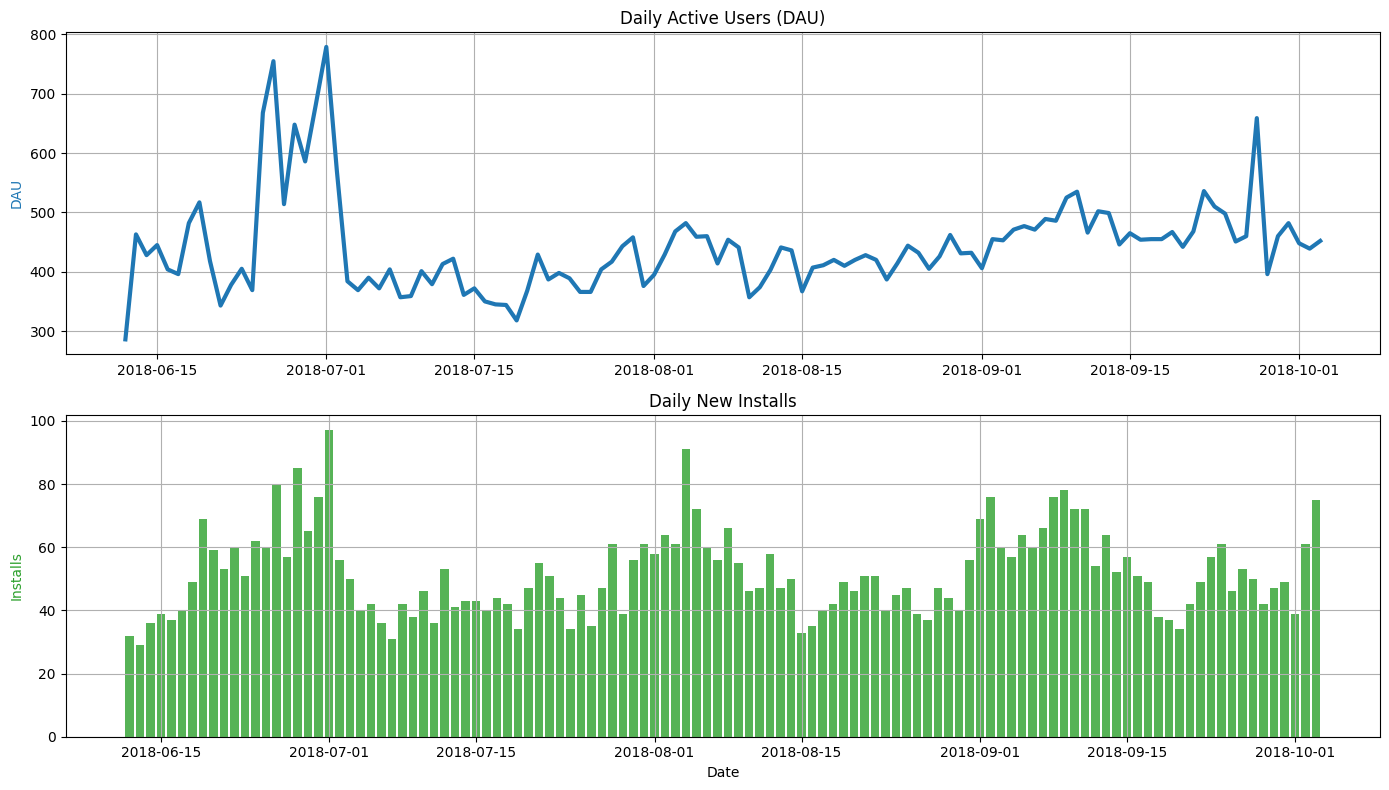

In [ ]:
install['install_date'] = pd.to_datetime(install['install_date'])
merged = pd.merge(DAU, install, left_on='date', right_on='install_date', how='outer')

fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=False)

# Subplot 1: DAU
axs[0].plot(merged['date'], merged['DAU'], color='tab:blue', linewidth=3, label='DAU')
axs[0].set_ylabel('DAU', color='tab:blue')
axs[0].set_title('Daily Active Users (DAU)')
axs[0].grid(True)

# Subplot 2: Installs
axs[1].bar(merged['install_date'], merged['installs'], color='tab:green', alpha=0.8, label='New Installs')
axs[1].set_ylabel('Installs', color='tab:green')
axs[1].set_title('Daily New Installs')
axs[1].grid(True)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

# Cohort

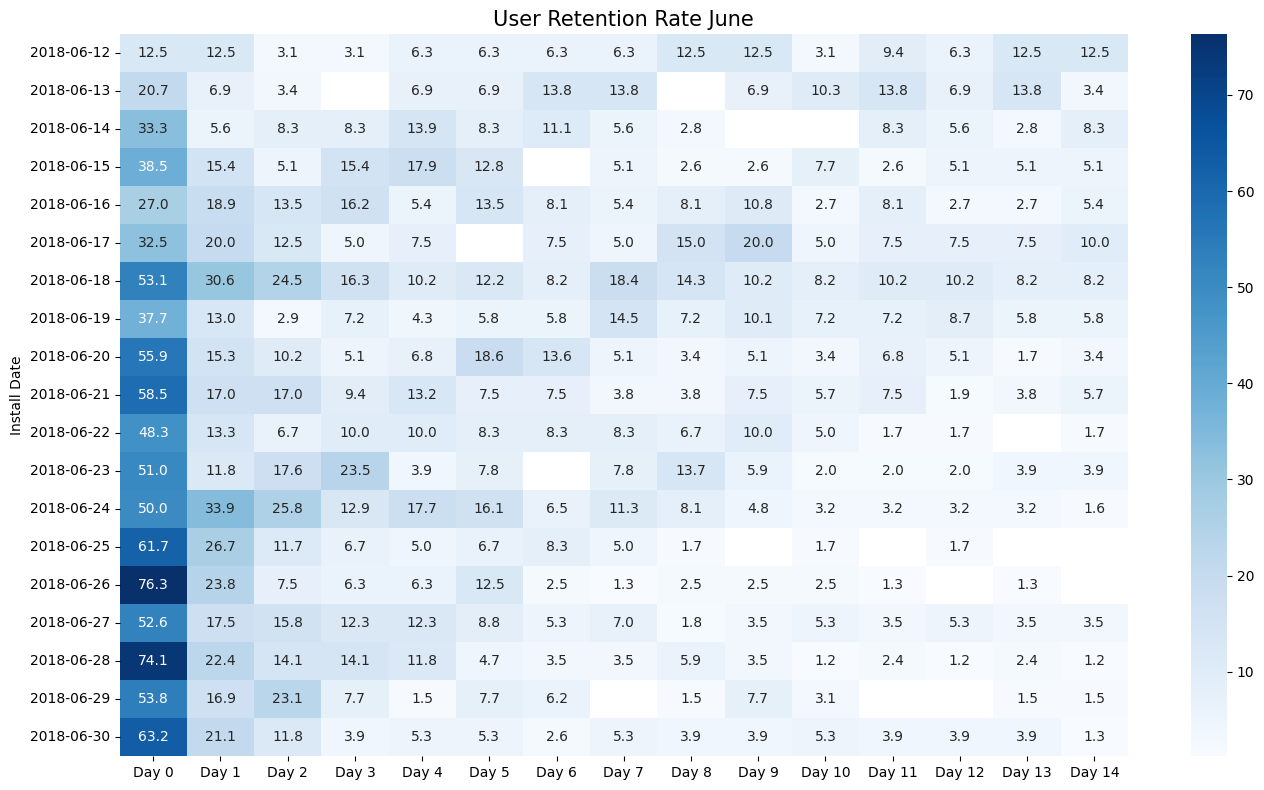

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mobile Game/Retention_14days_june.csv')

retention_matrix = df.pivot(index='install_date',
                            columns='days_after_install',
                            values='retention_rate')

retention_matrix.columns = [f'Day {i}' for i in retention_matrix.columns]

plt.figure(figsize=(14, 8))
sns.heatmap(retention_matrix, annot=True, fmt=".1f", cmap="Blues")
plt.title("User Retention Rate June", fontsize=15)
plt.ylabel("Install Date")
plt.tight_layout()
plt.show()

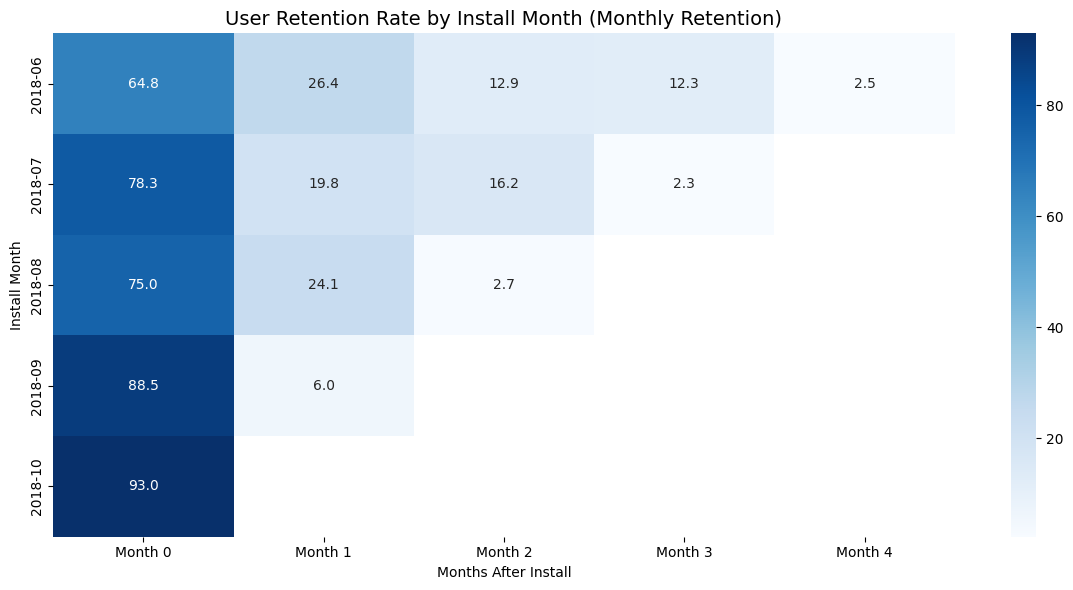

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/Mobile Game/monthly_retention_rate.csv')

retention_matrix = df.pivot(index='install_month',
                            columns='months_after_install',
                            values='retention_rate')

# Column Name
retention_matrix.columns = [f'Month {i}' for i in retention_matrix.columns]

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(retention_matrix, annot=True, fmt='.1f', cmap='Blues')
plt.title('User Retention Rate by Install Month (Monthly Retention)', fontsize=14)
plt.xlabel('Months After Install')
plt.ylabel('Install Month')
plt.tight_layout()
plt.show()